In [ ]:
!pip install optuna

     |████████████████████████████████| 296kB 8.8MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 163kB 12.3MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 143kB 14.2MB/s 
     |████████████████████████████████| 112kB 16.1MB/s 
     |████████████████████████████████| 81kB 7.5MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=ed7c2f8fb44d852782e53a80a328cebd26c75ed9c64f4724e57fc0778473e9ea
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [ ]:
from glob import glob
from keras import optimizers
from keras.models import load_model
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, models
import cv2
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import optuna
import os

In [ ]:
path = glob("character/*/")
data = []
label = [] 
total = 0
x = 32
y = 18

def append_data(directory, total):
  files = os.listdir(directory)
  print(files)
  for image in files:
    if image.endswith(".jpg"):
      image = cv2.imread(directory + image)
      image = cv2.resize(image, (x, y))
      image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      image_gs = image_gs.flatten()
      data.append(image_gs)
      label.append(total)

for i in path:
    append_data(i, total)
    total += 1

['ohhara_020.jpg', 'ohhara_022.jpg', 'ohhara_024.jpg', 'ohhara_025.jpg', 'ohhara_026.jpg', 'ohhara_028.jpg', 'ohhara_029.jpg', 'ohhara_030.jpg', 'ohhara_031.jpg', 'ohhara_032.jpg', 'ohhara_033.jpg', 'ohhara_035.jpg', 'ohhara_036.jpg', 'ohhara_037.jpg', 'ohhara_038.jpg', 'ohhara_039.jpg', 'ohhara_040.jpg', 'ohhara_041.jpg', 'ohhara_042.jpg', 'ohhara_043.jpg', 'ohhara_044.jpg', 'ohhara_046.jpg', 'ohhara_049.jpg', 'ohhara_050.jpg', 'ohhara_051.jpg', 'ohhara_052.jpg', 'ohhara_059.jpg', 'ohhara_017.jpg', 'ohhara_015.jpg', 'ohhara_014.jpg', 'ohhara_019.jpg', 'ohhara_016.jpg', 'ohhara_018.jpg', 'ohhara_047.jpg', 'ohhara_027.jpg', 'ohhara_021.jpg', 'ohhara_048.jpg', 'ohhara_057.jpg', 'ohhara_053.jpg', 'ohhara_055.jpg', 'ohhara_058.jpg', 'ohhara_054.jpg', 'ohhara_001.jpg', 'ohhara_002.jpg', 'ohhara_003.jpg', 'ohhara_005.jpg', 'ohhara_008.jpg', 'ohhara_012.jpg', 'ohhara_023.jpg', 'ohhara_034.jpg', 'ohhara_064.jpg', 'ohhara_066.jpg', 'ohhara_067.jpg', 'ohhara_068.jpg', 'ohhara_069.jpg', 'ohhara_0

In [ ]:
data = np.array(data, dtype=np.float64)
label = np.array(label, dtype=np.float64)

train_data, test_data, train_label, test_label = train_test_split(data, label, random_state=1, stratify=label, test_size=0.2)

train_data = train_data.reshape((len(train_data)), x, y, 1)
test_data = test_data.reshape((len(test_data)), x, y, 1)

train_data /= 255
test_data /= 255

train_label = to_categorical(train_label, num_classes=7)
test_label = to_categorical(test_label, num_classes=7)
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(904, 32, 18, 1)
(904, 7)
(226, 32, 18, 1)
(226, 7)


In [ ]:
model_list = []
result_list = []

def create_model(layer, activation):
  model = model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(x, y, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))
  model.add(layers.Flatten())
  for i in range(layer):
    model.add(layers.Dense(64, activation=activation))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(7, activation="softmax"))
    return model

def optimisation(choice):
  K.clear_session()
  layer = choice.suggest_int("layer", 1, 3)
  activation = choice.suggest_categorical("activation", ["relu", "sigmoid"])
  optimizer = choice.suggest_categorical("optimizer", ["sgd", "adam", "rmsprop"])
  model = create_model(layer, activation)
  model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  result = model.fit(train_data, train_label, batch_size=batchsize, epochs=epoch, verbose=2, validation_data=(test_data, test_label))
  model_list.append(model)
  result_list.append(result)
  return 1 - result.history["val_accuracy"][-1]

In [ ]:
batchsize = 16
epoch = 64
study = optuna.create_study()
study.optimize(optimisation, n_trials=16)

[I 2021-03-08 11:41:03,416] A new study created in memory with name: no-name-dca488ad-ea27-438c-af13-cb9c955b0e2c


Epoch 1/64
57/57 - 3s - loss: 1.7663 - accuracy: 0.4082 - val_loss: 1.9008 - val_accuracy: 0.1858
Epoch 2/64
57/57 - 1s - loss: 1.1037 - accuracy: 0.6427 - val_loss: 1.8937 - val_accuracy: 0.2434
Epoch 3/64
57/57 - 1s - loss: 0.8161 - accuracy: 0.7412 - val_loss: 1.8982 - val_accuracy: 0.1858
Epoch 4/64
57/57 - 1s - loss: 0.5970 - accuracy: 0.8341 - val_loss: 2.0752 - val_accuracy: 0.1327
Epoch 5/64
57/57 - 1s - loss: 0.3753 - accuracy: 0.9115 - val_loss: 2.0546 - val_accuracy: 0.1504
Epoch 6/64
57/57 - 1s - loss: 0.2576 - accuracy: 0.9502 - val_loss: 2.0365 - val_accuracy: 0.1770
Epoch 7/64
57/57 - 1s - loss: 0.1929 - accuracy: 0.9690 - val_loss: 1.8589 - val_accuracy: 0.3053
Epoch 8/64
57/57 - 1s - loss: 0.1335 - accuracy: 0.9834 - val_loss: 1.9114 - val_accuracy: 0.3053
Epoch 9/64
57/57 - 1s - loss: 0.0859 - accuracy: 0.9956 - val_loss: 1.2467 - val_accuracy: 0.6372
Epoch 10/64
57/57 - 1s - loss: 0.0722 - accuracy: 0.9978 - val_loss: 1.1394 - val_accuracy: 0.6239
Epoch 11/64
57/57 -

[I 2021-03-08 11:42:21,761] Trial 0 finished with value: 0.2566371560096741 and parameters: {'layer': 2, 'activation': 'relu', 'optimizer': 'adam'}. Best is trial 0 with value: 0.2566371560096741.


Epoch 1/64
57/57 - 2s - loss: 1.6074 - accuracy: 0.4491 - val_loss: 2.0194 - val_accuracy: 0.1770
Epoch 2/64
57/57 - 1s - loss: 0.9360 - accuracy: 0.7301 - val_loss: 2.2539 - val_accuracy: 0.1770
Epoch 3/64
57/57 - 1s - loss: 0.6261 - accuracy: 0.8219 - val_loss: 2.3599 - val_accuracy: 0.1770
Epoch 4/64
57/57 - 1s - loss: 0.4484 - accuracy: 0.8960 - val_loss: 2.5363 - val_accuracy: 0.1770
Epoch 5/64
57/57 - 1s - loss: 0.2816 - accuracy: 0.9480 - val_loss: 2.4838 - val_accuracy: 0.1858
Epoch 6/64
57/57 - 1s - loss: 0.1909 - accuracy: 0.9690 - val_loss: 2.2194 - val_accuracy: 0.2389
Epoch 7/64
57/57 - 1s - loss: 0.1300 - accuracy: 0.9801 - val_loss: 2.1876 - val_accuracy: 0.2345
Epoch 8/64
57/57 - 1s - loss: 0.0881 - accuracy: 0.9923 - val_loss: 1.9061 - val_accuracy: 0.3319
Epoch 9/64
57/57 - 1s - loss: 0.0517 - accuracy: 0.9989 - val_loss: 1.4393 - val_accuracy: 0.4956
Epoch 10/64
57/57 - 1s - loss: 0.0392 - accuracy: 1.0000 - val_loss: 1.2327 - val_accuracy: 0.5885
Epoch 11/64
57/57 -

[I 2021-03-08 11:43:39,594] Trial 1 finished with value: 0.3539823293685913 and parameters: {'layer': 3, 'activation': 'relu', 'optimizer': 'adam'}. Best is trial 0 with value: 0.2566371560096741.


Epoch 1/64
57/57 - 2s - loss: 1.9458 - accuracy: 0.3186 - val_loss: 1.9203 - val_accuracy: 0.1814
Epoch 2/64
57/57 - 1s - loss: 1.6339 - accuracy: 0.4292 - val_loss: 1.8170 - val_accuracy: 0.2876
Epoch 3/64
57/57 - 1s - loss: 1.4187 - accuracy: 0.5265 - val_loss: 1.5944 - val_accuracy: 0.4204
Epoch 4/64
57/57 - 1s - loss: 1.3147 - accuracy: 0.5642 - val_loss: 1.4571 - val_accuracy: 0.4867
Epoch 5/64
57/57 - 1s - loss: 1.0657 - accuracy: 0.6493 - val_loss: 1.6118 - val_accuracy: 0.4292
Epoch 6/64
57/57 - 1s - loss: 0.9075 - accuracy: 0.7002 - val_loss: 1.4441 - val_accuracy: 0.5044
Epoch 7/64
57/57 - 1s - loss: 0.6803 - accuracy: 0.7998 - val_loss: 1.3729 - val_accuracy: 0.5841
Epoch 8/64
57/57 - 1s - loss: 0.6404 - accuracy: 0.8208 - val_loss: 1.3288 - val_accuracy: 0.6283
Epoch 9/64
57/57 - 1s - loss: 0.4725 - accuracy: 0.8684 - val_loss: 1.3413 - val_accuracy: 0.6327
Epoch 10/64
57/57 - 1s - loss: 0.3801 - accuracy: 0.9071 - val_loss: 1.0034 - val_accuracy: 0.6903
Epoch 11/64
57/57 -

[I 2021-03-08 11:44:56,605] Trial 2 finished with value: 0.2654867172241211 and parameters: {'layer': 1, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 0 with value: 0.2566371560096741.


Epoch 1/64
57/57 - 2s - loss: 1.4786 - accuracy: 0.5022 - val_loss: 2.1902 - val_accuracy: 0.1726
Epoch 2/64
57/57 - 1s - loss: 0.9232 - accuracy: 0.7013 - val_loss: 2.4674 - val_accuracy: 0.1372
Epoch 3/64
57/57 - 1s - loss: 0.6475 - accuracy: 0.8075 - val_loss: 2.3929 - val_accuracy: 0.1858
Epoch 4/64
57/57 - 1s - loss: 0.4690 - accuracy: 0.8927 - val_loss: 2.3512 - val_accuracy: 0.2876
Epoch 5/64
57/57 - 1s - loss: 0.3436 - accuracy: 0.9181 - val_loss: 2.3123 - val_accuracy: 0.2212
Epoch 6/64
57/57 - 1s - loss: 0.2052 - accuracy: 0.9635 - val_loss: 2.2032 - val_accuracy: 0.2566
Epoch 7/64
57/57 - 1s - loss: 0.1619 - accuracy: 0.9712 - val_loss: 2.1414 - val_accuracy: 0.3363
Epoch 8/64
57/57 - 1s - loss: 0.1100 - accuracy: 0.9790 - val_loss: 1.9040 - val_accuracy: 0.2876
Epoch 9/64
57/57 - 1s - loss: 0.1013 - accuracy: 0.9856 - val_loss: 1.8512 - val_accuracy: 0.3982
Epoch 10/64
57/57 - 1s - loss: 0.0867 - accuracy: 0.9889 - val_loss: 1.4143 - val_accuracy: 0.4867
Epoch 11/64
57/57 -

[I 2021-03-08 11:46:21,993] Trial 3 finished with value: 0.28318583965301514 and parameters: {'layer': 3, 'activation': 'relu', 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.2566371560096741.


Epoch 1/64
57/57 - 2s - loss: 1.7146 - accuracy: 0.4159 - val_loss: 1.8974 - val_accuracy: 0.1283
Epoch 2/64
57/57 - 1s - loss: 1.0557 - accuracy: 0.6482 - val_loss: 2.0831 - val_accuracy: 0.1283
Epoch 3/64
57/57 - 1s - loss: 0.7755 - accuracy: 0.7611 - val_loss: 2.2512 - val_accuracy: 0.1283
Epoch 4/64
57/57 - 1s - loss: 0.5715 - accuracy: 0.8363 - val_loss: 2.4025 - val_accuracy: 0.1283
Epoch 5/64
57/57 - 1s - loss: 0.4319 - accuracy: 0.8938 - val_loss: 2.4864 - val_accuracy: 0.1283
Epoch 6/64
57/57 - 1s - loss: 0.2875 - accuracy: 0.9403 - val_loss: 2.8201 - val_accuracy: 0.1283
Epoch 7/64
57/57 - 1s - loss: 0.2048 - accuracy: 0.9723 - val_loss: 2.4094 - val_accuracy: 0.1858
Epoch 8/64
57/57 - 1s - loss: 0.1452 - accuracy: 0.9812 - val_loss: 1.7268 - val_accuracy: 0.3938
Epoch 9/64
57/57 - 1s - loss: 0.0874 - accuracy: 0.9945 - val_loss: 1.5128 - val_accuracy: 0.4690
Epoch 10/64
57/57 - 1s - loss: 0.0653 - accuracy: 0.9945 - val_loss: 1.4649 - val_accuracy: 0.5531
Epoch 11/64
57/57 -

[I 2021-03-08 11:47:41,511] Trial 4 finished with value: 0.3451327681541443 and parameters: {'layer': 3, 'activation': 'relu', 'optimizer': 'adam'}. Best is trial 0 with value: 0.2566371560096741.


Epoch 1/64
57/57 - 2s - loss: 1.8098 - accuracy: 0.3971 - val_loss: 2.0625 - val_accuracy: 0.1770
Epoch 2/64
57/57 - 1s - loss: 1.4650 - accuracy: 0.5277 - val_loss: 1.7993 - val_accuracy: 0.2522
Epoch 3/64
57/57 - 1s - loss: 1.2549 - accuracy: 0.5907 - val_loss: 1.7104 - val_accuracy: 0.4690
Epoch 4/64
57/57 - 1s - loss: 1.2097 - accuracy: 0.5962 - val_loss: 1.5236 - val_accuracy: 0.4690
Epoch 5/64
57/57 - 1s - loss: 1.1071 - accuracy: 0.6217 - val_loss: 2.3171 - val_accuracy: 0.2788
Epoch 6/64
57/57 - 1s - loss: 0.8880 - accuracy: 0.7146 - val_loss: 1.4421 - val_accuracy: 0.5044
Epoch 7/64
57/57 - 1s - loss: 0.8150 - accuracy: 0.7290 - val_loss: 1.7914 - val_accuracy: 0.5088
Epoch 8/64
57/57 - 1s - loss: 0.6930 - accuracy: 0.7754 - val_loss: 1.1426 - val_accuracy: 0.6504
Epoch 9/64
57/57 - 1s - loss: 0.6113 - accuracy: 0.8020 - val_loss: 1.7055 - val_accuracy: 0.4779
Epoch 10/64
57/57 - 1s - loss: 0.4899 - accuracy: 0.8562 - val_loss: 1.2270 - val_accuracy: 0.6239
Epoch 11/64
57/57 -

[I 2021-03-08 11:48:58,257] Trial 5 finished with value: 0.23893803358078003 and parameters: {'layer': 2, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.23893803358078003.


Epoch 1/64
57/57 - 2s - loss: 1.4339 - accuracy: 0.5144 - val_loss: 1.9605 - val_accuracy: 0.1858
Epoch 2/64
57/57 - 1s - loss: 0.8799 - accuracy: 0.7323 - val_loss: 2.3904 - val_accuracy: 0.1770
Epoch 3/64
57/57 - 1s - loss: 0.5877 - accuracy: 0.8208 - val_loss: 2.4331 - val_accuracy: 0.1770
Epoch 4/64
57/57 - 1s - loss: 0.4586 - accuracy: 0.8772 - val_loss: 2.7376 - val_accuracy: 0.1770
Epoch 5/64
57/57 - 1s - loss: 0.3057 - accuracy: 0.9358 - val_loss: 2.5776 - val_accuracy: 0.2257
Epoch 6/64
57/57 - 1s - loss: 0.2133 - accuracy: 0.9624 - val_loss: 2.2172 - val_accuracy: 0.2832
Epoch 7/64
57/57 - 1s - loss: 0.1451 - accuracy: 0.9723 - val_loss: 1.8433 - val_accuracy: 0.2876
Epoch 8/64
57/57 - 1s - loss: 0.1120 - accuracy: 0.9834 - val_loss: 1.8178 - val_accuracy: 0.3673
Epoch 9/64
57/57 - 1s - loss: 0.0631 - accuracy: 0.9934 - val_loss: 1.4449 - val_accuracy: 0.5310
Epoch 10/64
57/57 - 1s - loss: 0.0362 - accuracy: 0.9978 - val_loss: 1.5615 - val_accuracy: 0.5177
Epoch 11/64
57/57 -

[I 2021-03-08 11:50:22,572] Trial 6 finished with value: 0.3849557638168335 and parameters: {'layer': 1, 'activation': 'relu', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.23893803358078003.


Epoch 1/64
57/57 - 2s - loss: 1.8381 - accuracy: 0.3396 - val_loss: 2.0956 - val_accuracy: 0.1327
Epoch 2/64
57/57 - 1s - loss: 1.4855 - accuracy: 0.5011 - val_loss: 1.7806 - val_accuracy: 0.2389
Epoch 3/64
57/57 - 1s - loss: 1.1367 - accuracy: 0.6305 - val_loss: 1.5385 - val_accuracy: 0.4425
Epoch 4/64
57/57 - 1s - loss: 0.9781 - accuracy: 0.6681 - val_loss: 1.6726 - val_accuracy: 0.4602
Epoch 5/64
57/57 - 1s - loss: 0.7676 - accuracy: 0.7423 - val_loss: 1.7377 - val_accuracy: 0.4204
Epoch 6/64
57/57 - 1s - loss: 0.6153 - accuracy: 0.8142 - val_loss: 1.4257 - val_accuracy: 0.4867
Epoch 7/64
57/57 - 1s - loss: 0.5023 - accuracy: 0.8551 - val_loss: 1.7190 - val_accuracy: 0.5000
Epoch 8/64
57/57 - 1s - loss: 0.3748 - accuracy: 0.9060 - val_loss: 1.1722 - val_accuracy: 0.6637
Epoch 9/64
57/57 - 1s - loss: 0.2948 - accuracy: 0.9192 - val_loss: 1.1548 - val_accuracy: 0.6195
Epoch 10/64
57/57 - 1s - loss: 0.2143 - accuracy: 0.9425 - val_loss: 0.9991 - val_accuracy: 0.7257
Epoch 11/64
57/57 -

[I 2021-03-08 11:51:45,938] Trial 7 finished with value: 0.3008849620819092 and parameters: {'layer': 3, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.23893803358078003.


Epoch 1/64
57/57 - 2s - loss: 1.9244 - accuracy: 0.3075 - val_loss: 1.9593 - val_accuracy: 0.1947
Epoch 2/64
57/57 - 1s - loss: 1.6510 - accuracy: 0.4049 - val_loss: 1.8656 - val_accuracy: 0.2434
Epoch 3/64
57/57 - 1s - loss: 1.4323 - accuracy: 0.5122 - val_loss: 1.9254 - val_accuracy: 0.3053
Epoch 4/64
57/57 - 1s - loss: 1.2068 - accuracy: 0.5907 - val_loss: 1.6853 - val_accuracy: 0.3274
Epoch 5/64
57/57 - 1s - loss: 1.0021 - accuracy: 0.6582 - val_loss: 1.2717 - val_accuracy: 0.5265
Epoch 6/64
57/57 - 1s - loss: 0.7898 - accuracy: 0.7400 - val_loss: 1.4835 - val_accuracy: 0.5133
Epoch 7/64
57/57 - 1s - loss: 0.6174 - accuracy: 0.8031 - val_loss: 1.4118 - val_accuracy: 0.6018
Epoch 8/64
57/57 - 1s - loss: 0.4577 - accuracy: 0.8529 - val_loss: 1.4010 - val_accuracy: 0.5841
Epoch 9/64
57/57 - 1s - loss: 0.3281 - accuracy: 0.9027 - val_loss: 1.0641 - val_accuracy: 0.7168
Epoch 10/64
57/57 - 1s - loss: 0.2667 - accuracy: 0.9259 - val_loss: 1.1193 - val_accuracy: 0.6549
Epoch 11/64
57/57 -

[I 2021-03-08 11:53:09,128] Trial 8 finished with value: 0.269911527633667 and parameters: {'layer': 2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.23893803358078003.


Epoch 1/64
57/57 - 2s - loss: 1.5372 - accuracy: 0.4735 - val_loss: 2.1522 - val_accuracy: 0.1283
Epoch 2/64
57/57 - 1s - loss: 0.9922 - accuracy: 0.6748 - val_loss: 2.5277 - val_accuracy: 0.1283
Epoch 3/64
57/57 - 1s - loss: 0.7950 - accuracy: 0.7611 - val_loss: 2.8387 - val_accuracy: 0.1283
Epoch 4/64
57/57 - 1s - loss: 0.5908 - accuracy: 0.8341 - val_loss: 2.9987 - val_accuracy: 0.1327
Epoch 5/64
57/57 - 1s - loss: 0.4827 - accuracy: 0.8717 - val_loss: 2.6186 - val_accuracy: 0.1372
Epoch 6/64
57/57 - 1s - loss: 0.4060 - accuracy: 0.9027 - val_loss: 2.7038 - val_accuracy: 0.1416
Epoch 7/64
57/57 - 1s - loss: 0.2969 - accuracy: 0.9425 - val_loss: 2.3653 - val_accuracy: 0.1903
Epoch 8/64
57/57 - 1s - loss: 0.2295 - accuracy: 0.9646 - val_loss: 2.3318 - val_accuracy: 0.1283
Epoch 9/64
57/57 - 1s - loss: 0.2029 - accuracy: 0.9790 - val_loss: 1.5567 - val_accuracy: 0.4956
Epoch 10/64
57/57 - 1s - loss: 0.1471 - accuracy: 0.9889 - val_loss: 1.3054 - val_accuracy: 0.5841
Epoch 11/64
57/57 -

[I 2021-03-08 11:54:21,721] Trial 9 finished with value: 0.3053097128868103 and parameters: {'layer': 3, 'activation': 'relu', 'optimizer': 'sgd'}. Best is trial 5 with value: 0.23893803358078003.


Epoch 1/64
57/57 - 2s - loss: 1.5372 - accuracy: 0.4812 - val_loss: 2.0183 - val_accuracy: 0.1770
Epoch 2/64
57/57 - 1s - loss: 0.8876 - accuracy: 0.7168 - val_loss: 1.9918 - val_accuracy: 0.1770
Epoch 3/64
57/57 - 1s - loss: 0.6254 - accuracy: 0.7931 - val_loss: 1.9713 - val_accuracy: 0.3584
Epoch 4/64
57/57 - 1s - loss: 0.4281 - accuracy: 0.8861 - val_loss: 2.0295 - val_accuracy: 0.2522
Epoch 5/64
57/57 - 1s - loss: 0.3386 - accuracy: 0.9115 - val_loss: 2.0844 - val_accuracy: 0.2743
Epoch 6/64
57/57 - 1s - loss: 0.2211 - accuracy: 0.9569 - val_loss: 2.0898 - val_accuracy: 0.2301
Epoch 7/64
57/57 - 1s - loss: 0.1563 - accuracy: 0.9768 - val_loss: 1.3757 - val_accuracy: 0.5619
Epoch 8/64
57/57 - 1s - loss: 0.1326 - accuracy: 0.9856 - val_loss: 1.1750 - val_accuracy: 0.6504
Epoch 9/64
57/57 - 1s - loss: 0.0965 - accuracy: 0.9923 - val_loss: 1.5642 - val_accuracy: 0.4381
Epoch 10/64
57/57 - 1s - loss: 0.0707 - accuracy: 0.9989 - val_loss: 0.8484 - val_accuracy: 0.7345
Epoch 11/64
57/57 -

[I 2021-03-08 11:55:34,341] Trial 10 finished with value: 0.24336284399032593 and parameters: {'layer': 2, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 5 with value: 0.23893803358078003.


Epoch 1/64
57/57 - 2s - loss: 1.5177 - accuracy: 0.4923 - val_loss: 1.8876 - val_accuracy: 0.2035
Epoch 2/64
57/57 - 1s - loss: 0.7992 - accuracy: 0.7356 - val_loss: 1.8333 - val_accuracy: 0.2832
Epoch 3/64
57/57 - 1s - loss: 0.5857 - accuracy: 0.8164 - val_loss: 1.9885 - val_accuracy: 0.1991
Epoch 4/64
57/57 - 1s - loss: 0.3609 - accuracy: 0.9082 - val_loss: 1.9505 - val_accuracy: 0.1770
Epoch 5/64
57/57 - 1s - loss: 0.2314 - accuracy: 0.9569 - val_loss: 1.9075 - val_accuracy: 0.1858
Epoch 6/64
57/57 - 1s - loss: 0.1994 - accuracy: 0.9580 - val_loss: 1.7591 - val_accuracy: 0.2345
Epoch 7/64
57/57 - 1s - loss: 0.1369 - accuracy: 0.9867 - val_loss: 1.3822 - val_accuracy: 0.5000
Epoch 8/64
57/57 - 1s - loss: 0.0953 - accuracy: 0.9923 - val_loss: 1.2314 - val_accuracy: 0.5619
Epoch 9/64
57/57 - 1s - loss: 0.0682 - accuracy: 0.9967 - val_loss: 1.1935 - val_accuracy: 0.5973
Epoch 10/64
57/57 - 1s - loss: 0.0533 - accuracy: 0.9989 - val_loss: 0.9065 - val_accuracy: 0.7168
Epoch 11/64
57/57 -

[I 2021-03-08 11:56:46,851] Trial 11 finished with value: 0.25221240520477295 and parameters: {'layer': 2, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 5 with value: 0.23893803358078003.


Epoch 1/64
57/57 - 2s - loss: 1.5297 - accuracy: 0.5033 - val_loss: 1.8661 - val_accuracy: 0.2345
Epoch 2/64
57/57 - 1s - loss: 0.7865 - accuracy: 0.7412 - val_loss: 1.7817 - val_accuracy: 0.4248
Epoch 3/64
57/57 - 1s - loss: 0.5121 - accuracy: 0.8462 - val_loss: 1.8232 - val_accuracy: 0.1814
Epoch 4/64
57/57 - 1s - loss: 0.3246 - accuracy: 0.9237 - val_loss: 1.8879 - val_accuracy: 0.1460
Epoch 5/64
57/57 - 1s - loss: 0.2143 - accuracy: 0.9679 - val_loss: 1.9947 - val_accuracy: 0.1814
Epoch 6/64
57/57 - 1s - loss: 0.1451 - accuracy: 0.9845 - val_loss: 1.4975 - val_accuracy: 0.4159
Epoch 7/64
57/57 - 1s - loss: 0.1173 - accuracy: 0.9912 - val_loss: 1.5802 - val_accuracy: 0.3761
Epoch 8/64
57/57 - 1s - loss: 0.0759 - accuracy: 0.9978 - val_loss: 1.4598 - val_accuracy: 0.4558
Epoch 9/64
57/57 - 1s - loss: 0.0690 - accuracy: 1.0000 - val_loss: 1.1996 - val_accuracy: 0.5796
Epoch 10/64
57/57 - 1s - loss: 0.0511 - accuracy: 0.9978 - val_loss: 0.9311 - val_accuracy: 0.7168
Epoch 11/64
57/57 -

[I 2021-03-08 11:57:59,570] Trial 12 finished with value: 0.26106196641921997 and parameters: {'layer': 2, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 5 with value: 0.23893803358078003.


Epoch 1/64
57/57 - 2s - loss: 1.5896 - accuracy: 0.4646 - val_loss: 2.0086 - val_accuracy: 0.1283
Epoch 2/64
57/57 - 1s - loss: 0.8465 - accuracy: 0.7223 - val_loss: 2.0918 - val_accuracy: 0.1283
Epoch 3/64
57/57 - 1s - loss: 0.5665 - accuracy: 0.8396 - val_loss: 2.1228 - val_accuracy: 0.1372
Epoch 4/64
57/57 - 1s - loss: 0.4219 - accuracy: 0.8772 - val_loss: 2.2199 - val_accuracy: 0.1504
Epoch 5/64
57/57 - 1s - loss: 0.2773 - accuracy: 0.9414 - val_loss: 2.2257 - val_accuracy: 0.1239
Epoch 6/64
57/57 - 1s - loss: 0.2010 - accuracy: 0.9591 - val_loss: 2.1451 - val_accuracy: 0.1814
Epoch 7/64
57/57 - 1s - loss: 0.1490 - accuracy: 0.9823 - val_loss: 2.1037 - val_accuracy: 0.2566
Epoch 8/64
57/57 - 1s - loss: 0.1110 - accuracy: 0.9867 - val_loss: 1.5052 - val_accuracy: 0.4558
Epoch 9/64
57/57 - 1s - loss: 0.0798 - accuracy: 0.9945 - val_loss: 1.3209 - val_accuracy: 0.5708
Epoch 10/64
57/57 - 1s - loss: 0.0896 - accuracy: 0.9934 - val_loss: 0.8420 - val_accuracy: 0.7301
Epoch 11/64
57/57 -

[I 2021-03-08 11:59:13,480] Trial 13 finished with value: 0.2654867172241211 and parameters: {'layer': 1, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 5 with value: 0.23893803358078003.


Epoch 1/64
57/57 - 2s - loss: 1.4957 - accuracy: 0.5000 - val_loss: 2.0384 - val_accuracy: 0.1991
Epoch 2/64
57/57 - 1s - loss: 0.8280 - accuracy: 0.7212 - val_loss: 1.9037 - val_accuracy: 0.2699
Epoch 3/64
57/57 - 1s - loss: 0.5305 - accuracy: 0.8584 - val_loss: 1.9035 - val_accuracy: 0.1327
Epoch 4/64
57/57 - 1s - loss: 0.3574 - accuracy: 0.9027 - val_loss: 2.0875 - val_accuracy: 0.1372
Epoch 5/64
57/57 - 1s - loss: 0.2511 - accuracy: 0.9491 - val_loss: 1.8855 - val_accuracy: 0.1637
Epoch 6/64
57/57 - 1s - loss: 0.1819 - accuracy: 0.9701 - val_loss: 1.7329 - val_accuracy: 0.3142
Epoch 7/64
57/57 - 1s - loss: 0.1244 - accuracy: 0.9900 - val_loss: 1.7021 - val_accuracy: 0.3407
Epoch 8/64
57/57 - 1s - loss: 0.0823 - accuracy: 0.9967 - val_loss: 1.7466 - val_accuracy: 0.3673
Epoch 9/64
57/57 - 1s - loss: 0.0895 - accuracy: 0.9912 - val_loss: 1.3537 - val_accuracy: 0.5619
Epoch 10/64
57/57 - 1s - loss: 0.0605 - accuracy: 1.0000 - val_loss: 1.0460 - val_accuracy: 0.6770
Epoch 11/64
57/57 -

[I 2021-03-08 12:00:26,942] Trial 14 finished with value: 0.26106196641921997 and parameters: {'layer': 2, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 5 with value: 0.23893803358078003.


Epoch 1/64
57/57 - 2s - loss: 1.9388 - accuracy: 0.3197 - val_loss: 2.0931 - val_accuracy: 0.1947
Epoch 2/64
57/57 - 1s - loss: 1.6165 - accuracy: 0.4049 - val_loss: 1.8630 - val_accuracy: 0.2389
Epoch 3/64
57/57 - 1s - loss: 1.5229 - accuracy: 0.4458 - val_loss: 1.6949 - val_accuracy: 0.3097
Epoch 4/64
57/57 - 1s - loss: 1.3161 - accuracy: 0.5918 - val_loss: 1.6193 - val_accuracy: 0.3938
Epoch 5/64
57/57 - 1s - loss: 1.2016 - accuracy: 0.6117 - val_loss: 1.3945 - val_accuracy: 0.5619
Epoch 6/64
57/57 - 1s - loss: 1.0448 - accuracy: 0.6615 - val_loss: 1.4541 - val_accuracy: 0.4558
Epoch 7/64
57/57 - 1s - loss: 0.9730 - accuracy: 0.6781 - val_loss: 2.6345 - val_accuracy: 0.2124
Epoch 8/64
57/57 - 1s - loss: 0.8513 - accuracy: 0.7113 - val_loss: 1.3500 - val_accuracy: 0.4336
Epoch 9/64
57/57 - 1s - loss: 0.6920 - accuracy: 0.7821 - val_loss: 1.3283 - val_accuracy: 0.5265
Epoch 10/64
57/57 - 1s - loss: 0.5440 - accuracy: 0.8385 - val_loss: 1.5189 - val_accuracy: 0.5398
Epoch 11/64
57/57 -

[I 2021-03-08 12:01:43,588] Trial 15 finished with value: 0.3008849620819092 and parameters: {'layer': 2, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.23893803358078003.


In [ ]:
df = study.trials_dataframe()
df.head()

,number,value,datetime_start,datetime_complete,duration,params_activation,params_layer,params_optimizer,state
0,0,0.256637,2021-03-08 11:41:03.422126,2021-03-08 11:42:21.759075,0 days 00:01:18.336949,relu,2,adam,COMPLETE
1,1,0.353982,2021-03-08 11:42:21.765290,2021-03-08 11:43:39.594269,0 days 00:01:17.828979,relu,3,adam,COMPLETE
2,2,0.265487,2021-03-08 11:43:39.596291,2021-03-08 11:44:56.605493,0 days 00:01:17.009202,sigmoid,1,adam,COMPLETE
3,3,0.283186,2021-03-08 11:44:56.606906,2021-03-08 11:46:21.992784,0 days 00:01:25.385878,relu,3,rmsprop,COMPLETE
4,4,0.345133,2021-03-08 11:46:21.997478,2021-03-08 11:47:41.511326,0 days 00:01:19.513848,relu,3,adam,COMPLETE


In [ ]:
print(study.best_params)
print(1-study.best_value)
print(study.best_trial)
print()

sorted_best_params = sorted(study.best_params.items(), key=lambda x:x[0])
for key, value in sorted_best_params:
  print(f"{key}: {value}")

{'layer': 2, 'activation': 'sigmoid', 'optimizer': 'adam'}
0.76106196641922
FrozenTrial(number=5, values=[0.23893803358078003], datetime_start=datetime.datetime(2021, 3, 8, 11, 47, 41, 514186), datetime_complete=datetime.datetime(2021, 3, 8, 11, 48, 58, 256527), params={'layer': 2, 'activation': 'sigmoid', 'optimizer': 'adam'}, distributions={'layer': IntUniformDistribution(high=3, low=1, step=1), 'activation': CategoricalDistribution(choices=('relu', 'sigmoid')), 'optimizer': CategoricalDistribution(choices=('sgd', 'adam', 'rmsprop'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=5, state=TrialState.COMPLETE, value=None)

activation: sigmoid
layer: 2
optimizer: adam


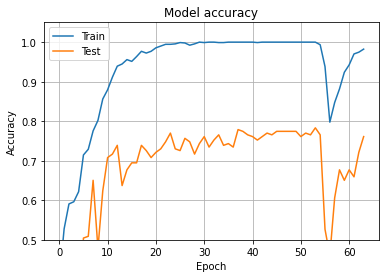

In [ ]:
plt.plot(result_list[study.best_trial.number].history["accuracy"])
plt.plot(result_list[study.best_trial.number].history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.ylim(0.5, 1.05)
plt.grid()
plt.show()

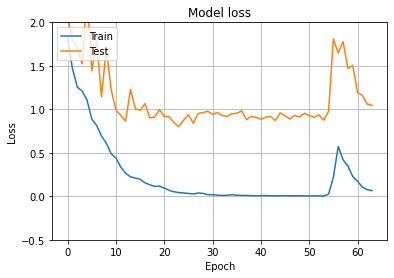

In [ ]:
plt.plot(result_list[study.best_trial.number].history["loss"])
plt.plot(result_list[study.best_trial.number].history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.ylim(-0.5, 2)
plt.grid()
plt.show()

In [ ]:
model_list[study.best_trial.number].save("identification_optuna.h5")